In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (20,6)

In [29]:
data = pd.read_csv('data/full_data.csv', delimiter = ';', parse_dates=True, index_col=0)

In [30]:
data

,timestamp,customer_no,location,weekday,time,customer_id
0,2019-09-02 07:03:00,1,dairy,Monday,07:03:00,Monday 1
1,2019-09-02 07:03:00,2,dairy,Monday,07:03:00,Monday 2
2,2019-09-02 07:04:00,3,dairy,Monday,07:04:00,Monday 3
3,2019-09-02 07:04:00,4,dairy,Monday,07:04:00,Monday 4
4,2019-09-02 07:04:00,5,spices,Monday,07:04:00,Monday 5
...,...,...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,Friday,21:50:00,Friday 1500
5121,2019-09-06 21:50:00,1507,checkout,Friday,21:50:00,Friday 1507
5122,2019-09-06 21:50:00,1508,checkout,Friday,21:50:00,Friday 1508
5123,2019-09-06 21:50:00,1509,drinks,Friday,21:50:00,Friday 1509


In [31]:
data.dtypes

timestamp      object
customer_no     int64
location       object
weekday        object
time           object
customer_id    object
dtype: object

In [32]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [33]:
data.dtypes

timestamp      datetime64[ns]
customer_no             int64
location               object
weekday                object
time                   object
customer_id            object
dtype: object

In [34]:
data.shape

(24877, 6)

In [35]:
data.isna().any()

timestamp      False
customer_no    False
location       False
weekday        False
time           False
customer_id    False
dtype: bool

In [36]:
# Total no of customers
data.groupby('weekday', sort=False)['customer_no'].nunique()

weekday
Monday       1447
Tuesday      1422
Wednesday    1531
Thursday     1535
Friday       1510
Name: customer_no, dtype: int64

In [37]:
# Calculate the total number of customers in each section
data.groupby('location')['customer_id'].nunique().sort_values(ascending=False)

location
checkout    7417
fruit       4284
dairy       3818
drinks      3214
spices      2938
Name: customer_id, dtype: int64

In [38]:
# Additional analysis: Calculate the total number of customers in each section by day of the week
pd.DataFrame(data.groupby(['weekday','location'])['customer_id'].nunique().sort_values(ascending=False))

,,customer_id
weekday,location,
Thursday,checkout,1532
Wednesday,checkout,1526
Friday,checkout,1502
Monday,checkout,1437
Tuesday,checkout,1420
Wednesday,fruit,884
Friday,fruit,874
Thursday,fruit,872
Tuesday,fruit,827


In [39]:
# Calculate the total number of customers in each section over time
pd.DataFrame(data.groupby(by=['location', 'timestamp'])['customer_no'].count())

customer_no
location timestamp                       
checkout 2019-09-02 07:05:00            2
         2019-09-02 07:06:00            2
         2019-09-02 07:07:00            1
         2019-09-02 07:08:00            3
         2019-09-02 07:09:00            1
...                                   ...
spices   2019-09-06 21:28:00            1
         2019-09-06 21:31:00            1
         2019-09-06 21:42:00            1
         2019-09-06 21:49:00            1
         2019-09-06 21:50:00            1

[13839 rows x 1 columns]

In [40]:
# Count customer for each hour for location
pd.DataFrame(data.set_index('timestamp').groupby([pd.Grouper(freq='H'), pd.Grouper('location')])['customer_no'].count())

customer_no
timestamp           location             
2019-09-02 07:00:00 checkout           92
                    dairy              59
                    drinks             60
                    fruit              54
                    spices             52
...                                   ...
2019-09-06 21:00:00 checkout           52
                    dairy              39
                    drinks             34
                    fruit              36
                    spices             20

[375 rows x 1 columns]

In [41]:
# Display the number of customers at checkout over time
pd.DataFrame(data.groupby(by=['location', 'timestamp'])['customer_no'].count()).filter(like='checkout', axis=0)

customer_no
location timestamp                       
checkout 2019-09-02 07:05:00            2
         2019-09-02 07:06:00            2
         2019-09-02 07:07:00            1
         2019-09-02 07:08:00            3
         2019-09-02 07:09:00            1
...                                   ...
         2019-09-06 21:37:00            1
         2019-09-06 21:45:00            1
         2019-09-06 21:47:00            2
         2019-09-06 21:48:00            2
         2019-09-06 21:50:00            2

[3460 rows x 1 columns]

<AxesSubplot:xlabel='location,timestamp'>

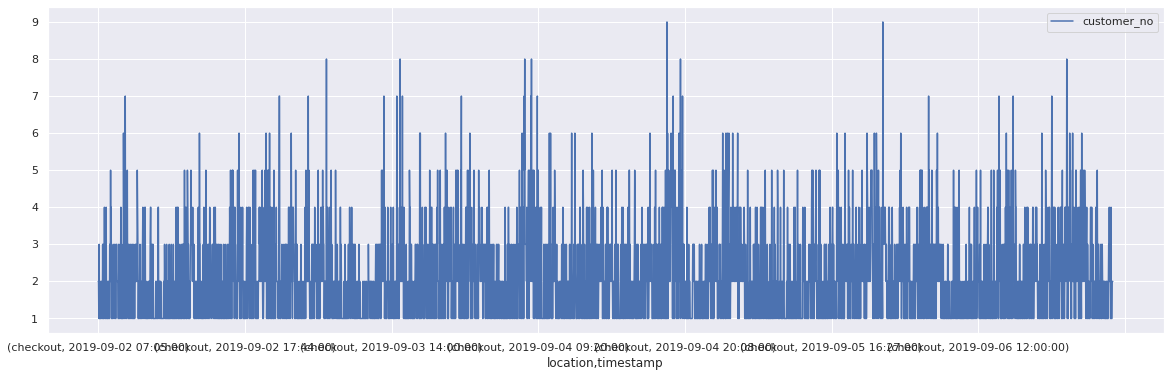

In [42]:
pd.DataFrame(data.groupby(by=['location', 'timestamp'])['customer_no'].count()).filter(like='checkout', axis=0).plot(kind="line")

In [43]:
# Calculate the time each customer spent in the market
### TBD ###

In [ ]:
### TBD ###

In [ ]:
# Calculate time spent in supermarket

In [ ]:
### TBD ###

In [ ]:
# Additional analysis: Show descriptives of time_spent

In [ ]:
### TBD ###

In [ ]:
# Calculate the total number of customers in the supermarket over time

<AxesSubplot:xlabel='timestamp'>

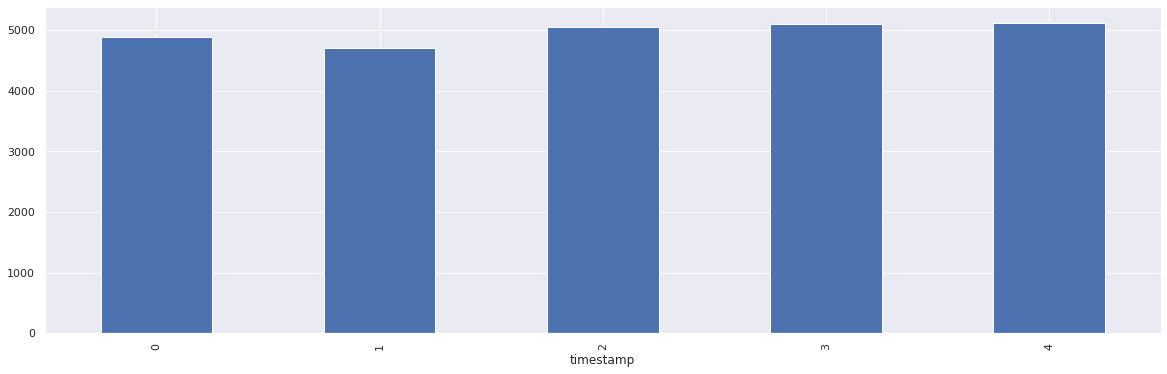

In [44]:
data.groupby(data['timestamp'].dt.weekday)['customer_id'].count().plot(kind="bar")

<AxesSubplot:xlabel='timestamp'>

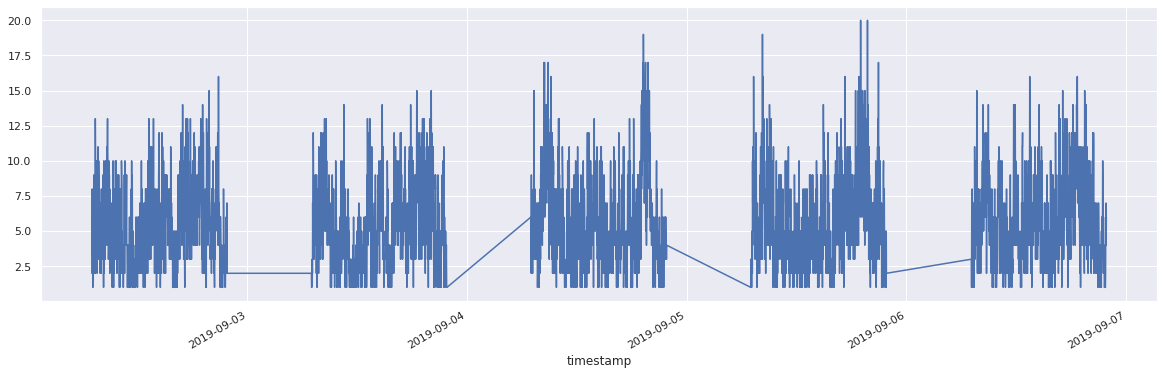

In [45]:
data.groupby(['timestamp'])['customer_no'].count().plot(kind="line")

In [ ]:
# Our business managers think that the first section customers visit follows a different pattern than the following ones.
# Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”)

In [36]:
### TBD ###

In [ ]:
## Challenge revenue estimate:

In [ ]:
### TBD ###